# Data Science

## What is Data Science?

Definition: the discipline of drawing conclusions from data using computation.
There are 3 core aspects of effective data analysis:
* Exploration
    * Identifying patterns in information
    * Uses visualization
* Inference
    * Quantifying degree of certainty
        * Are those patterns reliable?
        * Will those patterns we found would appear in new observations?
* Prediction
    * Using the information we have to make informed guess about values or information we want to know
    * Uses machine learning

## Little Women

In this example, we're going to explore statistics of the classic novel *Little Women* by Louisa May Alcott. The code below might look intimidating but for now, don't worry about it.

In [2]:
# Stuff that will appear at the top of notebooks;
# You don't have to do anything about it.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from ipywidgets import *

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

#Assign the whole text to variable 'little_women_url'
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
#Read into the url and assign it to variable 'little_women_text'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

## Literary Characters

If we open [Little Women](https://www.inferentialthinking.com/data/little_women.txt), which is available online, you can see the entire text of *Little Women*.

In [8]:
Table().with_columns('Text', little_women_chapters)

Text
ONE PLAYING PILGRIMS "Christmas won't be Christmas witho ...
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
THREE THE LAURENCE BOY "Jo! Jo! Where are you?" cried Me ...
FOUR BURDENS "Oh, dear, how hard it does seem to take up ...
FIVE BEING NEIGHBORLY "What in the world are you going t ...
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
SEVEN AMY'S VALLEY OF HUMILIATION "That boy is a perfect ...
EIGHT JO MEETS APOLLYON "Girls, where are you going?" as ...
NINE MEG GOES TO VANITY FAIR "I do think it was the most ...
TEN THE P.C. AND P.O. As spring came on, a new set of am ...
... (37 rows omitted)

**Above**, we read the text of both books into list of chapters, called `little_women_chapters`.

While a computer can't understand the text of a book, it can provide us with some insight into the structure of the text. The name `little_women_chapters` is currently bound to a list of all chapters in the book.

We can see that each chapter begins with a literal number **(e.g. ONE, TWO)** followed by the first sentence of the chapter.

In [9]:
np.char.count(little_women_chapters, 'Christmas')

array([8, 9, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

**Above**, we see an array of the number of times the word **Christmas** appear in each chapter. The result can be interpreted as the following:
* In chapter 1, the word *Christmas* appears 8 times
* In chapter 2, the word *Christmas* appears 9 times
* In chapter 3, the word *Christmas* appears 1 times
... and so on.

In [12]:
Table().with_columns([
    'Jo', np.char.count(little_women_chapters, 'Jo'),
    'Meg', np.char.count(little_women_chapters, 'Meg'),
    'Amy', np.char.count(little_women_chapters, 'Amy'),
    'Beth', np.char.count(little_women_chapters, 'Beth'),
    'Christmas', np.char.count(little_women_chapters, 'Christmas'),
])

Jo   | Meg  | Amy  | Beth | Christmas
44   | 26   | 23   | 26   | 8
21   | 20   | 13   | 12   | 9
62   | 36   | 2    | 2    | 1
34   | 17   | 14   | 18   | 1
55   | 13   | 6    | 14   | 1
13   | 5    | 6    | 28   | 0
9    | 5    | 27   | 5    | 0
71   | 16   | 48   | 9    | 0
21   | 71   | 3    | 5    | 0
12   | 4    | 5    | 5    | 0
... (37 rows omitted)

**Above**, we see a table that displays the number of times a certain word appearsin each chapter. Each row represent a different chapter, with the second row representing the first chapter.

We can also visualize this table! See below for implementation.

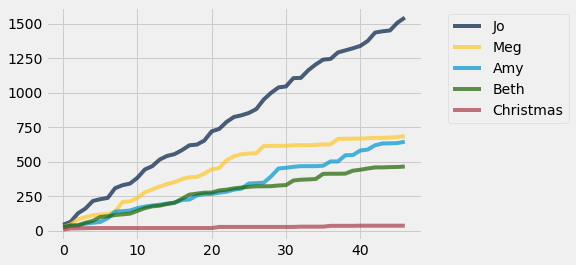

In [13]:
Table().with_columns([
    'Jo', np.char.count(little_women_chapters, 'Jo'),
    'Meg', np.char.count(little_women_chapters, 'Meg'),
    'Amy', np.char.count(little_women_chapters, 'Amy'),
    'Beth', np.char.count(little_women_chapters, 'Beth'),
    'Christmas', np.char.count(little_women_chapters, 'Christmas'),
]).cumsum().plot(overlay=True)

**Above**, We can deduce the following information:
* By chapter 10, the word *Meg* has appeared in total roughly 250 times
* By chapter 20, the word *Amy* has appeared in total roughly 250 times
* By chapter 70, the word *Jo* has appeared in total roughly close to 750 times
* In the whole book, the name *Jo* is mentioned the most

Now we're going to add a feature to the plot so that you can input any word or character and see how many times that word/character appear in the text.

In [16]:
def plot_custom(name):
    Table().with_columns([
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Christmas', np.char.count(little_women_chapters, 'Christmas'),
        name, np.char.count(little_women_chapters, name)
    ]).cumsum().plot(overlay=True)
    plots.show()
    
_ = interact_manual(plot_custom, name = 'Obama')

interactive(children=(Text(value='Obama', description='name'), Button(description='Run Interact', style=Button…

## Another Kind of Character

Now, we're going to compare the number of characters with the number of periods in each chapter.

In [18]:
Table().with_columns([
    'Characters', [len(c) for c in little_women_chapters],
    'Periods', np.char.count(little_women_chapters, '.')
])

Characters | Periods
21759      | 189
22148      | 188
20558      | 231
25526      | 195
23395      | 255
14622      | 140
14431      | 131
22476      | 214
33767      | 337
18508      | 185
... (37 rows omitted)

If we plot the data from above,

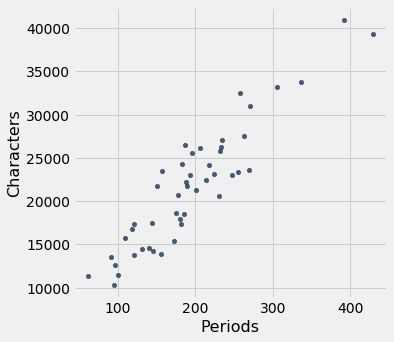

In [4]:
Table().with_columns([
    'Characters', [len(c) for c in little_women_chapters],
    'Periods', np.char.count(little_women_chapters, '.')
]).scatter('Periods')